## Gather

In [466]:
import pandas as pd
from pandas import DataFrame
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [467]:
#importing the WeRateDogs Twitter archive (CSV file)
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [468]:
#double check if the operation was succesfull
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [469]:
#downloading programmatically (with request libary) the tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url).content
tweet_images= pd.read_csv(io.StringIO(response.decode('utf-8')), delimiter='\t')

In [470]:
#double check if the operation was succesfull
tweet_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [471]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 798576900688019456
Fail
607: 7983

Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 7597

Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167:

Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441:

Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716:

Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990:

Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265:

Now I will read the tweet_json.txt file line by line into a pandas DataFrame
with tweet ID, retweet count, and favorite count as outcome
 
 source: https://discuss.analyticsvidhya.com/t/reading-a-text-file-in-python/18515
 https://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list

In [474]:
#reading tweet_json.txt file line by line into a pandas DataFrame
#with tweet ID, retweet count, and favorite count
# I noticed in the cleaning part that I also need to add addtional columns in order 
# to access all data. We have in total 67 rows where the favorite_count and retweet_count is
# in column retweeted and favorited
tweet_list = []
with open('tweet-json.txt') as f:
    for line in f:
        content = f.readline()
        tweet_id = [line.strip() for line in line.split(',')][1]
        favorite_count = [line.strip() for line in line.split(',')][-6]
        retweet_count = [line.strip() for line in line.split(',')][-7]
        retweeted = [line.strip() for line in line.split(',')][-4]
        favorited = [line.strip() for line in line.split(',')][-5]
        lang = [line.strip() for line in line.split(',')][-1]
        tweet_list.append({'tweet_id': tweet_id,
                        'favorite_count': favorite_count,
                        'retweet_count'  : retweet_count,
                        'retweeted': retweeted,
                        'favorited' : favorited, 
                       
                          })
tweet_measurements = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count', 'retweet_count', 'retweeted','favorited'])

In [475]:
#double check if the operation was succesfull
tweet_measurements.head()

,tweet_id,favorite_count,retweet_count,retweeted,favorited
0,"""id"": 892420643555336193","""favorite_count"": 39467","""retweet_count"": 8853","""retweeted"": false","""favorited"": false"
1,"""id"": 891815181378084864","""favorite_count"": 25461","""retweet_count"": 4328","""retweeted"": false","""favorited"": false"
2,"""id"": 891327558926688256","""favorite_count"": 41048","""retweet_count"": 9774","""retweeted"": false","""favorited"": false"
3,"""id"": 890971913173991426","""favorite_count"": 12041","""retweet_count"": 2158","""retweeted"": false","""favorited"": false"
4,"""id"": 890609185150312448","""favorite_count"": 28226","""retweet_count"": 4429","""retweeted"": false","""favorited"": false"


## ASSES

#### In the first step I will do a visual assesment of the three tables: `twitter_archive`, `tweet_images` & `tweet_measurements` and collect my findings

In [476]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [477]:
tweet_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [478]:
tweet_measurements

,tweet_id,favorite_count,retweet_count,retweeted,favorited
0,"""id"": 892420643555336193","""favorite_count"": 39467","""retweet_count"": 8853","""retweeted"": false","""favorited"": false"
1,"""id"": 891815181378084864","""favorite_count"": 25461","""retweet_count"": 4328","""retweeted"": false","""favorited"": false"
2,"""id"": 891327558926688256","""favorite_count"": 41048","""retweet_count"": 9774","""retweeted"": false","""favorited"": false"
3,"""id"": 890971913173991426","""favorite_count"": 12041","""retweet_count"": 2158","""retweeted"": false","""favorited"": false"
4,"""id"": 890609185150312448","""favorite_count"": 28226","""retweet_count"": 4429","""retweeted"": false","""favorited"": false"
5,"""id"": 890006608113172480","""favorite_count"": 31166","""retweet_count"": 7624","""retweeted"": false","""favorited"": false"
6,"""id"": 889665388333682689","""favorite_count"": 38818","""retweet_count"": 8538","""retweeted"": false","""favorited"": false"
7,"""id"": 889531135344209921","""favorite_count"": 15359","""retweet_count"": 2321","""retweeted"": false","""favorited"": false"
8,"""id"": 888917238123831296","""favorite_count"": 29611","""retweet_count"": 4709","""retweeted"": false","""favorited"": false"
9,"""id"": 888554962724278272","""favorite_count"": 20290","""retweet_count"": 3732","""retweeted"": false","""favorited"": false"


#### In the next step I will futher investigate the tables programmatically

In [479]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [480]:
#since we just would like to have tweets till first of August, 
# I need to check this
(twitter_archive.timestamp.min(), twitter_archive.timestamp.max())

('2015-11-15 22:32:08 +0000', '2017-08-01 16:23:56 +0000')

In [481]:
tweet_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [482]:
tweet_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 5 columns):
tweet_id          1177 non-null object
favorite_count    1177 non-null object
retweet_count     1177 non-null object
retweeted         1177 non-null object
favorited         1177 non-null object
dtypes: object(5)
memory usage: 46.1+ KB


In [483]:
# I will check how many of the tweets are retweets in table tweet_measurements
tweet_measurements[tweet_measurements['retweeted'] == True]

,tweet_id,favorite_count,retweet_count,retweeted,favorited


In [484]:
# I will check the tweets which are retweets in table twitter_archive
twitter_archive.in_reply_to_status_id.min()

6.658146967007232e+17

In [485]:
twitter_archive[twitter_archive['in_reply_to_status_id'] == 6.658146967007232e+17]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1914,674330906434379776,6.658147e+17,16374678.0,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13/10\n@ABC7,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


#### Replies to other tweets might include ratings, so I will not exclude them

In [486]:
# in the next step I will check if there column duplicates (other than tweet_id) in the tables 
all_columns = pd.Series(list(twitter_archive) + list(tweet_images) + list(tweet_measurements))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

=There no column duplicates within the three tables

#### Now I will further investigate the values that are stored in the columns of all there tables to identify faulty values

In [487]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [488]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [489]:
# In the next step I will have closer look at the faulty values
twitter_archive[twitter_archive['rating_numerator'] == 0].text

315           When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object

#### The null values are part of the unique rating system of WeRateDogs

In [490]:
#In the next step I will have a closer look at the
# tweets to see if the high values are correct
pd.options.display.max_colwidth = 200
twitter_archive[twitter_archive['rating_numerator'] ==666].text

189    @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Name: text, dtype: object

In [491]:
twitter_archive[twitter_archive['rating_numerator'] ==204].text

1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object

#### The high values are part of the unique rating system of WeRateDogs

In [492]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [493]:
twitter_archive[twitter_archive['rating_denominator']== 0].text

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [494]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
an            7
Buddy         7
Bailey        7
Toby          7
Daisy         7
Jax           6
Oscar         6
Milo          6
Stanley       6
Dave          6
Jack          6
Rusty         6
Scout         6
Leo           6
Bella         6
Koda          6
Chester       5
           ... 
Bilbo         1
Jersey        1
William       1
Theo          1
Brownie       1
Sky           1
Gordon        1
Stella        1
Bobbay        1
Bloo          1
Franq         1
Pumpkin       1
Samsom        1
Marvin        1
Kawhi         1
Cora          1
Charl         1
Linus         1
Raphael       1
Stormy        1
Ralphus       1
Buddah        1
Harnold       1
Meatball      1
Pavlov        1
Devón         1
Flurpson      1
Ridley        1
by            1
Farfle        1
Name: name, Length: 957,

In [495]:
#In the next step I will have a closer look at the
# tweets to see if the values are correct
twitter_archive[twitter_archive['name']== 'a'].text

56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649                                Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
801                    Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002                   This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004                     Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1017                         This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
1049            

In [496]:
tweet_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [497]:
tweet_measurements.describe()

,tweet_id,favorite_count,retweet_count,retweeted,favorited
count,1177,1177,1177,1177,1177
unique,1177,1025,968,27,66
top,"""id"": 890006608113172480","""is_quote_status"": false","""lang"": ""en""}","""retweeted"": false","""favorited"": false"
freq,1,67,41,1110,1110


In [498]:
tweet_measurements.favorite_count.value_counts()

"is_quote_status": false    67
"favorite_count": 0         45
"favorite_count": 345        3
"favorite_count": 4537       2
"favorite_count": 3938       2
"favorite_count": 2890       2
"favorite_count": 471        2
"favorite_count": 640        2
"favorite_count": 8735       2
"favorite_count": 3837       2
"favorite_count": 2369       2
"favorite_count": 757        2
"favorite_count": 211        2
"favorite_count": 2169       2
"favorite_count": 2176       2
"favorite_count": 2828       2
"favorite_count": 2892       2
"favorite_count": 1941       2
"favorite_count": 522        2
"favorite_count": 2613       2
"favorite_count": 1074       2
"favorite_count": 785        2
"favorite_count": 1691       2
"favorite_count": 1114       2
"favorite_count": 3999       2
"favorite_count": 1760       2
"favorite_count": 4004       2
"favorite_count": 769        2
"favorite_count": 1896       2
"favorite_count": 1398       2
                            ..
"favorite_count": 27597      1
"favorit

In [499]:
tweet_measurements.retweet_count.value_counts()

"lang": "en"}             41
"contributors": null      25
"retweet_count": 888       3
"retweet_count": 1972      3
"retweet_count": 328       3
"retweet_count": 634       3
"retweet_count": 4319      3
"retweet_count": 1265      3
"retweet_count": 5496      2
"retweet_count": 1350      2
"retweet_count": 8521      2
"retweet_count": 1034      2
"retweet_count": 1085      2
"retweet_count": 1008      2
"retweet_count": 118       2
"retweet_count": 316       2
"retweet_count": 14198     2
"retweet_count": 2243      2
"retweet_count": 20500     2
"retweet_count": 2511      2
"retweet_count": 1101      2
"retweet_count": 618       2
"retweet_count": 1169      2
"retweet_count": 122       2
"retweet_count": 656       2
"retweet_count": 10723     2
"retweet_count": 403       2
"retweet_count": 60        2
"retweet_count": 349       2
"retweet_count": 510       2
                          ..
"retweet_count": 1510      1
"retweet_count": 778       1
"retweet_count": 4850      1
"retweet_count

In [500]:
tweet_images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Eskimo_dog                    18
teddy                         18
beagle                        18
Shetland_sheepdog             18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

Now I also check for duplicates in the 3 tables

In [501]:
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [502]:
tweet_images[tweet_images.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [503]:
tweet_measurements[tweet_measurements.duplicated()]

,tweet_id,favorite_count,retweet_count,retweeted,favorited


#### =The tables have no duplicates

#### Quality

##### `General issues:`
all 3 tables have a different amount of entries/ rows

##### `twitter_archive ` table
- missing values in columns "in_reply_to_status_id", "retweeted_status_id", "retweeted_status_timestamp"	
- missing values in name column and wrong values in name columns:
  - None         (680x)
  - a            (55x)
  - an           (6x)
- Erroneous datatype (doggo, floofer, pupper, puppo, timestamp, tweet_id, in_reply_to_status_id, in_reply_to_user_id )
- wrong value in the rating_denominator column (0 in row 313)
- 181 tweets are retweets

##### `tweet_images` table
- wrong value in the p1 values: "shopping_cart", "convertible"
- undescriptive column names in this table
- different formats of the breed-values for the dogs
- Erroneous datatype (tweet_id (str instead),  p1, p2, p3 (category instead)

##### `tweet_measurements` table
- The column name in the beginning of all values in all columns of this table
- wrong values in the favorite_count and retweet_count column. "is_quote_status": false"(67 entries total) and "contributors": null" (25 entries total), "lang": "en"}(41 entries total) instead of favorite count and retweet count in for ex. row 27, 1148, 1168. In total 67 entries.
- Erroneous datatype (retweeted, favorited)

#### Tidiness
- tweet_measurements result of image Predictions should be part of the twitter_archive table
- rating_numerator & rating_denominator should be one column in (each info in one column)
- dog stages floofer, pupper, puppo, doggo are spread in 4 columns. they should be merged into one.

I will now chose 8 of Quality and 2 Tidiness issues in order to clean them in the next step.
My choice will base on the upcoming Investigation and will base on severity of the issue. My goal is to have data that helps me to investigate if the popularity of tweet (favorites & retweets) are related to the rating or the breed and if there is are breeds that gets rated better than other breeds (does WeRateDogs has a favorite breed)?

In the first step I will create copies of the tables twitter_archive, tweet_images, tweet_measurements

### Clean

In the first step I will create copies of the tables twitter_archive, tweet_images, tweet_measurements

In [504]:
twitter_archive_clean = twitter_archive.copy()
tweet_images_clean = tweet_images.copy()
tweet_measurements_clean = tweet_measurements.copy()

In [505]:
# double check if the operation was succesful
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [506]:
# double check if the operation was succesful
tweet_images_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [507]:
# double check if the operation was succesful
tweet_measurements_clean.head(2)

,tweet_id,favorite_count,retweet_count,retweeted,favorited
0,"""id"": 892420643555336193","""favorite_count"": 39467","""retweet_count"": 8853","""retweeted"": false","""favorited"": false"
1,"""id"": 891815181378084864","""favorite_count"": 25461","""retweet_count"": 4328","""retweeted"": false","""favorited"": false"


##### 1.  `tweet_measurements` table: The column name in the beginning of all values in all columns of this table

#### Define

cutting off the text in the beginng of every row of the all columns in table tweet_measurements: tweet_id, favorite_count, retweet_count, retweeted and favorited

#### Code

In [508]:
tweet_measurements_clean.tweet_id = tweet_measurements_clean.tweet_id.str.replace('"id":','').str.strip()
tweet_measurements_clean.favorite_count = tweet_measurements_clean.favorite_count.str.replace('"favorite_count":','').str.strip()
tweet_measurements_clean.retweet_count = tweet_measurements_clean.retweet_count.str.replace('"retweet_count":','').str.strip()
tweet_measurements_clean.retweeted = tweet_measurements_clean.retweeted.str.replace('"retweeted":','').str.strip()
tweet_measurements_clean.favorited = tweet_measurements_clean.favorited.str.replace('"favorited":','').str.strip()

### Test

In [509]:
# double check if the operation was succesful
tweet_measurements_clean.head()

,tweet_id,favorite_count,retweet_count,retweeted,favorited
0,892420643555336193,39467,8853,false,false
1,891815181378084864,25461,4328,false,false
2,891327558926688256,41048,9774,false,false
3,890971913173991426,12041,2158,false,false
4,890609185150312448,28226,4429,false,false


##### 2. `tweet_measurements` table:  wrong values in the favorite_count and retweet_count column

#### Define

identifying the wrong values and filling the missing values with the information from the txt file

#### Iteration:
This showed me that I need to get more columns from the txt file in order to get the missing information; so I will go back to the Gather part to add the columns retweeted andfavorited to the dataframe twitter_measurements

#### Code

In [510]:
# identifying the wrong values and storing them in a new data frame called wrong_values
wrong_values = tweet_measurements_clean[tweet_measurements_clean['favorite_count'] == '"is_quote_status": false']

In [511]:
wrong_values.head()

,tweet_id,favorite_count,retweet_count,retweeted,favorited
27,881633300179243008,"""is_quote_status"": false","""contributors"": null","""favorite_count"": 129","""retweet_count"": 7"
36,878404777348136964,"""is_quote_status"": false","""lang"": ""en""}","""favorite_count"": 0","""retweet_count"": 1349"
45,874434818259525634,"""is_quote_status"": false","""lang"": ""en""}","""favorite_count"": 0","""retweet_count"": 15546"
48,873337748698140672,"""is_quote_status"": false","""lang"": ""en""}","""favorite_count"": 0","""retweet_count"": 1667"
50,872668790621863937,"""is_quote_status"": false","""lang"": ""en""}","""favorite_count"": 0","""retweet_count"": 31"


In [512]:
# dropping the columns favorite_count and retweet_count
wrong_values = wrong_values.drop(['favorite_count', 'retweet_count'], axis=1)
# renaming the columns retweeted and favorited to favorite_count and retweet_count
wrong_values = wrong_values.rename(columns={"retweeted" : "favorite_count", "favorited": "retweet_count"})

In [513]:
wrong_values = wrong_values.rename(columns={"retweeted" : "retweet_count", "favorited": "favorite_count"})

In [514]:
# cutting off the text in the beginng of every row
wrong_values.favorite_count = wrong_values.favorite_count.str.replace('"favorite_count":','').str.strip()
wrong_values.retweet_count = wrong_values.retweet_count.str.replace('"retweet_count":','').str.strip()

In [515]:
# double checking the operation
wrong_values.head()

,tweet_id,favorite_count,retweet_count
27,881633300179243008,129,7
36,878404777348136964,0,1349
45,874434818259525634,0,15546
48,873337748698140672,0,1667
50,872668790621863937,0,31


In [516]:
# dropping the rows with the wrong values from tweet_measurements
tweet_measurements_clean = tweet_measurements_clean[tweet_measurements_clean.favorite_count !='"is_quote_status": false']
#double checking if all rows with wrong values are gone 
tweet_measurements_clean[tweet_measurements_clean['favorite_count'] == '"is_quote_status": false']
 

,tweet_id,favorite_count,retweet_count,retweeted,favorited


In [517]:
# appending the fixed values (wrong_value table) to the df
tweet_measurements_clean= tweet_measurements_clean.append(wrong_values)
#dropping the rows I just need for the cleaning process
tweet_measurements_clean= tweet_measurements_clean.drop(['favorited','retweeted'], axis=1)

### Test

In [518]:
# checking if the operations were succesful
tweet_measurements_clean.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,25461,4328,891815181378084864
2,41048,9774,891327558926688256
3,12041,2158,890971913173991426
4,28226,4429,890609185150312448


In [519]:
tweet_measurements_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 0 to 1148
Data columns (total 3 columns):
favorite_count    1177 non-null object
retweet_count     1177 non-null object
tweet_id          1177 non-null object
dtypes: object(3)
memory usage: 36.8+ KB


In [520]:
tweet_measurements_clean.favorite_count = tweet_measurements_clean.favorite_count.astype(int)
tweet_measurements_clean.retweet_count  = tweet_measurements_clean.retweet_count .astype(int)

In [521]:
tweet_measurements_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 0 to 1148
Data columns (total 3 columns):
favorite_count    1177 non-null int64
retweet_count     1177 non-null int64
tweet_id          1177 non-null object
dtypes: int64(2), object(1)
memory usage: 36.8+ KB


##### 3. `twitter_archive ` table: 181 tweets are retweets (we just want to have original tweets)

### Define

Deleting/excluding the rows/tweets that are retweets from twitter_archive and then deleting the columns concerning the retweets from the table twitter_archive

### Code

In [522]:
# deleting/excluding the rows/tweets that are retweets from twitter_archive
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
#deleting the columns concerning the retweets from the table twitter_archive
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

### Test

In [523]:
# double checking the operations
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


4. ##### `twitter_archive ` table:  Erroneous datatype (doggo, floofer, pupper, puppo, timestamp, tweet_id, in_reply_to_status_id, in_reply_to_user_id )

### Define

Convert doggo, floofer, pupper, puppo will category data type. Convert timestamp  to datetime and tweet_id, n_reply_to_status_id and in_reply_to_user_id to string data type.

In [524]:
# to category
twitter_archive_clean.doggo = twitter_archive_clean.doggo.astype('category')
twitter_archive_clean.floofer = twitter_archive_clean.floofer.astype('category')
twitter_archive_clean.pupper = twitter_archive_clean.pupper.astype('category')
twitter_archive_clean.puppo = twitter_archive_clean.puppo.astype('category')

# to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#to string
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(str
                                                                                            ) 

In [525]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null category
floofer                  2175 non-null category
pupper                   2175 non-null category
puppo                    2175 non-null category
dtypes: category(4), datetime64[ns](1), int64(2), object(7)
memory usage: 195.8+ KB


5. ##### `tweet_images ` table: Erroneous datatype (tweet_id (str instead), p1, p2, p3 (category instead)

### Define

Convert p1, p2, p3 to category data type. Convert tweet_id to string data type

### Code

In [526]:
# category
tweet_images.p1 = tweet_images.p1.astype('category')
tweet_images.p2 = tweet_images.p2.astype('category')
tweet_images.p3 = tweet_images.p3.astype('category')

# to string
tweet_images.teet_id = tweet_images.p3.astype(str)

In [527]:
tweet_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


##### 6.  `twitter_archive ` table:  wrong value in the rating_denominator column (0 in row 313)

### Define

Changing the null value in the denominator column (row 13) to 13 (as it is correct)

### Code

In [528]:
# Changing the all values in the denominator column to 10.
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.replace(0,10)

### Test

In [529]:
# checking if the operation was succesful
twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### 7.  `tweet_images` table: - undescriptive column names in this table

### Define

Change the following columns:
- img_num = number_images
- p1 = prediction_1
- p2 = prediction_2
- p3 = prediction_3
- p1_conf = confidence_prediction_1
- p2_conf = confidence_prediction_2
- p3_conf = confidence_prediction_3
- p1_dog = breed_prediction_1
- p2_dog = breed_prediction_2
- p3_dog = breed_prediction_3

### Code

In [530]:
tweet_images_clean = tweet_images_clean.rename(columns={
                                                'p1': 'prediction_1',
                                                'p2': 'prediction_2',
                                                'p3': 'prediction_3',
                                                'p1_conf': 'confidence_prediction_1',
                                                'p2_conf': 'confidence_prediction_2',
                                                'p3_conf': 'confidence_prediction_3',
                                                'p1_dog': 'breed_predicted_1',
                                                'p2_dog': 'breed_predicted_2',
                                                'p3_dog': 'breed_predicted_3'})

### Test

In [531]:
tweet_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                   2075 non-null int64
jpg_url                    2075 non-null object
img_num                    2075 non-null int64
prediction_1               2075 non-null object
confidence_prediction_1    2075 non-null float64
breed_predicted_1          2075 non-null bool
prediction_2               2075 non-null object
confidence_prediction_2    2075 non-null float64
breed_predicted_2          2075 non-null bool
prediction_3               2075 non-null object
confidence_prediction_3    2075 non-null float64
breed_predicted_3          2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### 8.  `tweet_images` table:  different formats of the breed-values for the dogs

### Define

changes all breed names to lower case and take away the _ in all breed names in 
prediction_1, prediction_2 and prediction_3

### Code

In [532]:
#changes all breed names to lower case and take away the _ in all breed names
tweet_images_clean['prediction_1'] = tweet_images_clean['prediction_1'].str.lower().str.replace('_', ' ')
tweet_images_clean['prediction_2'] = tweet_images_clean['prediction_2'].str.lower().str.replace('_', ' ')
tweet_images_clean['prediction_3'] = tweet_images_clean['prediction_3'].str.lower().str.replace('_', ' ')


### Test

In [533]:
tweet_images_clean['prediction_1'].sample(5)

1739       pomeranian
2026         web site
87               hare
2002       bloodhound
224     irish terrier
Name: prediction_1, dtype: object

In [534]:
tweet_images_clean['prediction_2'].sample(5)

351                     chow
783           siberian husky
658    flat-coated retriever
688          german shepherd
917            silky terrier
Name: prediction_2, dtype: object

In [535]:
tweet_images_clean['prediction_3'].sample(5)

516           labrador retriever
1587                  pomeranian
1509                        chow
605                  appenzeller
2066    chesapeake bay retriever
Name: prediction_3, dtype: object

 ## Tidiness

### Code

##### 1.  result of image Predictions and tweet_measurements should be in twitter_archive table

### Define 
integrate the column 'prediction_1','breed_predicted_1, etc. in table "twitter_archive_clean by merging the column with the twitter_archive on Tweet_id

Merge the favorite_count and retweet_count column to the twitter_archive_clean table, joining on tweet_id

### Code


In [536]:
# first I need to change the data type of column tweet_id to str (so it matches the data type from table twitter_archive)
tweet_images_clean.tweet_id = tweet_images_clean.tweet_id.astype(str)

In [537]:
#Isolate the tweet_ID and predictions columns in the tweet_images_clean table
id_breed = tweet_images_clean[['prediction_1','breed_predicted_1','prediction_2','breed_predicted_2', 'prediction_3', 'breed_predicted_3','tweet_id']]
#merging id_breed with twitter_archive_clean
twitter_archive_clean = pd.merge(twitter_archive_clean,id_breed,
                            on=['tweet_id'], how='left')
# Merge the favorite_count and retweet_count column to the twitter_archive_clean table, joining on tweet_id
twitter_archive_clean = pd.merge(twitter_archive_clean,tweet_measurements_clean, on=['tweet_id'], how='left')

### Test

In [538]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null category
floofer                  2175 non-null category
pupper                   2175 non-null category
puppo                    2175 non-null category
prediction_1             1994 non-null object
breed_predicted_1        1994 non-null object
prediction_2             1994 non-null object
breed_predicted_2        1994 non-null object
prediction_3             1994 non-null object
breed

In [539]:
twitter_archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,pupper,puppo,prediction_1,breed_predicted_1,prediction_2,breed_predicted_2,prediction_3,breed_predicted_3,favorite_count,retweet_count
395,815966073409433600,nan,nan,2017-01-02 17:00:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a pupper with squeaky hiccups. Please enjoy. 13/10 https://t.co/MiMKtsLN6k,https://twitter.com/dog_rates/status/815966073409433600/video/1,13,10,None,...,pupper,None,tibetan mastiff,True,tibetan terrier,True,otterhound,True,NaN,NaN
1702,675003128568291329,nan,nan,2015-12-10 17:24:21,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Laela. She's adorable. Magnificent eyes. But I don't see a seat belt. Insubordinate.. and churlish. Still 12/10 https://t.co/pCGDgLkLo6,"https://twitter.com/dog_rates/status/675003128568291329/photo/1,https://twitter.com/dog_rates/status/675003128568291329/photo/1",12,10,Laela,...,None,None,pembroke,True,pomeranian,True,cardigan,True,NaN,NaN
507,794205286408003585,nan,nan,2016-11-03 15:51:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Laika. She was a space pupper. The first space pupper actually. Orbited earth like a h*ckin boss. 14/10 hero af https://t.co/trSjgY3h4g,"https://twitter.com/dog_rates/status/794205286408003585/photo/1,https://twitter.com/dog_rates/status/794205286408003585/photo/1,https://twitter.com/dog_rates/status/794205286408003585/photo/1",14,10,Laika,...,pupper,None,pedestal,False,fountain,False,brass,False,10314.0,3895.0


In [540]:
tweet_images_clean[tweet_images_clean['tweet_id'] == '667470559035432960']

,tweet_id,jpg_url,img_num,prediction_1,confidence_prediction_1,breed_predicted_1,prediction_2,confidence_prediction_2,breed_predicted_2,prediction_3,confidence_prediction_3,breed_predicted_3
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy poodle,0.304175,True,pug,0.223427,True,lakeland terrier,0.073316,True


In [541]:
tweet_images_clean[tweet_images_clean['tweet_id'] == '666337882303524864']

,tweet_id,jpg_url,img_num,prediction_1,confidence_prediction_1,breed_predicted_1,prediction_2,confidence_prediction_2,breed_predicted_2,prediction_3,confidence_prediction_3,breed_predicted_3
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,newfoundland,0.278407,True,groenendael,0.102643,True


In [542]:
tweet_images_clean[tweet_images_clean['tweet_id'] == '671122204919246848']

,tweet_id,jpg_url,img_num,prediction_1,confidence_prediction_1,breed_predicted_1,prediction_2,confidence_prediction_2,breed_predicted_2,prediction_3,confidence_prediction_3,breed_predicted_3
281,671122204919246848,https://pbs.twimg.com/media/CVBOFTLWwAAzlNi.jpg,1,goose,0.351957,False,chihuahua,0.101228,True,hen,0.065818,False


##### 2. `twitter_archive`: dog stages floofer, pupper, puppo, doggo are spread in 4 columns. they should be merged into one.

### Define 

creating a new dataframe with the dog stages floofer, pupper, puppo, doggo in order to merge the 4 columns with a lambda function into one column named dog_stages.
Then merging the dog_stages column with the twitter_archive column and dropping the columns floofer, pupper, puppo, doggo from the table


In [543]:
#creating a new dataframe with the dog stages
df_dog_stages = twitter_archive_clean[['tweet_id','doggo','floofer','pupper','puppo']]
#replacing all None with Nan in order to drop them in the lambda functions
df_dog_stages = df_dog_stages.replace('None', np.nan)

In [544]:
# merge the 4 columns with a lambda function into one column named dog_stages
df_dog_stages['dog_stages'] = df_dog_stages[df_dog_stages.columns[1:]].apply(
    lambda x: ', '.join(x.dropna()),
    axis=1)
#creplacing all empty columns with NaN
df_dog_stages = df_dog_stages.replace('', np.nan)
df_dog_stages = df_dog_stages.drop(['doggo','floofer','pupper', 'puppo'],axis=1)

In [545]:
# Merge the dog_stages to the twitter_archive_clean table, joining on tweet_id and droping the old columns
twitter_archive_clean = pd.merge(twitter_archive_clean,df_dog_stages, on=['tweet_id'], how='left')
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper', 'puppo'],axis=1)

In [546]:
twitter_archive_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,prediction_1,breed_predicted_1,prediction_2,breed_predicted_2,prediction_3,breed_predicted_3,favorite_count,retweet_count,dog_stages
230,841439858740625411,nan,nan,2017-03-14 00:04:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,"https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,http...",14,10,None,military uniform,False,labrador retriever,True,groenendael,True,NaN,NaN,NaN
760,754011816964026368,nan,nan,2016-07-15 17:56:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh,"https://twitter.com/dog_rates/status/754011816964026368/photo/1,https://twitter.com/dog_rates/status/754011816964026368/photo/1",12,10,Charlie,french bulldog,True,boston bull,True,boxer,True,9726.0,4079.0,NaN


In [547]:
# Storing the clean DataFrame in a CSV file named twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

Please find further information about the wrangle process in the Wrangle Report (

### Explore Dataset- Questions

I would like to know if the success of a tweet in terms of amount of retweets and favorites is related to the rating from WeRateDogs (have higher rated dogs more retweets & get more favorites)

Furthermore, it would be interesting to investigagte if the creator of WeRateDogs rate a some breeds better than others. Can we see from the data if the owners have a favorite breed? 

In contrast, do the user have rate a some breeds retweet and fovourite some breeds more than others. Can we see from the data if the owners have a favorite breed?

In [548]:
# creating a copy of the twitter_archive_clean for the investigation
tweet_archive = twitter_archive_clean.copy()
tweet_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,prediction_1,breed_predicted_1,prediction_2,breed_predicted_2,prediction_3,breed_predicted_3,favorite_count,retweet_count,dog_stages
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,orange,False,bagel,False,banana,False,39467.0,8853.0,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,chihuahua,True,pekinese,True,papillon,True,NaN,NaN,NaN


In [549]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 19 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
prediction_1             1994 non-null object
breed_predicted_1        1994 non-null object
prediction_2             1994 non-null object
breed_predicted_2        1994 non-null object
prediction_3             1994 non-null object
breed_predicted_3        1994 non-null object
favorite_count           1090 non-null float64
retweet_count            1090 non-null float64
dog_stages               344 non-null object
dtypes: date

#### Since I wont need all columns for my investigation I will drop the following columns from the data frame:
  - in_reply_to_status_id
  - in_reply_to_user_id
  - timestamp
  - source
  - expanded_urls
  - dog_stages
  

In [550]:
# dropping columns from the df
tweet_archive = tweet_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id','timestamp', 'source', 'expanded_urls', 'dog_stages'], axis=1)


In [551]:
# double checking if the operation was succesful
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
prediction_1          1994 non-null object
breed_predicted_1     1994 non-null object
prediction_2          1994 non-null object
breed_predicted_2     1994 non-null object
prediction_3          1994 non-null object
breed_predicted_3     1994 non-null object
favorite_count        1090 non-null float64
retweet_count         1090 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 237.9+ KB


#### Saving the result of the images prediction in a new coloum called breed. By doing so, I make sure that I can investigate the data in the best way. Writing a function that takes the breed of prediction 1 if True, otherwise goes to to the second prediction and checks if the prediction is True (and takes this value if True). If also the second prediction isnt True, go to prediction 3 and takes the value from there (if True)

In [552]:
def get_breed(tweet_archive):
    if tweet_archive['breed_predicted_1'] == True:
        return tweet_archive['prediction_1']
    elif (tweet_archive['breed_predicted_1'] == False) & (tweet_archive['breed_predicted_2'] == True):
        return tweet_archive['prediction_2'] 
    elif (tweet_archive['breed_predicted_1'] == False) & (tweet_archive['breed_predicted_2'] == False) & (tweet_archive['breed_predicted_3'] == True):
        return tweet_archive['prediction_3']
    else:
        return 'no breed predicted'

tweet_archive['breed'] = tweet_archive.apply(get_breed, axis = 1)
# changing the data type of breed to categorical
tweet_archive.breed = tweet_archive.breed.astype('category')

In [553]:
# testing if the operation was successful
tweet_archive['breed'].value_counts()

no breed predicted             489
golden retriever               158
labrador retriever             108
pembroke                        95
chihuahua                       91
pug                             62
toy poodle                      51
chow                            48
samoyed                         42
pomeranian                      42
malamute                        33
chesapeake bay retriever        31
french bulldog                  31
cocker spaniel                  30
miniature pinscher              25
eskimo dog                      22
cardigan                        21
staffordshire bullterrier       21
german shepherd                 21
siberian husky                  20
shih-tzu                        20
beagle                          20
shetland sheepdog               19
rottweiler                      19
maltese dog                     19
lakeland terrier                18
kuvasz                          18
italian greyhound               17
basset              

In [554]:
#dropping prediction_1, breed_predicted_1 prediction_2, breed_predicted_2 prediction_3 breed_predicted_3
tweet_archive = tweet_archive.drop(['prediction_1','breed_predicted_1','prediction_2','breed_predicted_2','prediction_3','breed_predicted_3'], axis= 1)

In [555]:
tweet_archive.sample(2)

,tweet_id,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,breed
66,879008229531029506,This is Beau. That is Beau's balloon. He takes it everywhere. 13/10 would protect at all costs https://t.co/YDtpCjIPKN,13,10,Beau,NaN,NaN,vizsla
1143,706291001778950144,When you're just relaxin and having a swell time but then remember you have to fill out the FAFSA ...11/10 https://t.co/qy33OBcexg,11,10,None,1861.0,522.0,border terrier


#### Another problem that I see is that we have not for every tweet the following values: breed, favorite_count , retweet_count:

In [556]:
tweet_archive.breed[tweet_archive['breed'] != "no breed predicted"].count()

1686

In [557]:
tweet_archive.breed = tweet_archive.breed[tweet_archive['breed'] != "no breed predicted"]

In [558]:
tweet_archive.favorite_count.isnull().sum()

1085

In [559]:
tweet_archive.retweet_count.isnull().sum()

1085

In [560]:
# dropping the null values from the data set which I created by just including values >0
tweet_archiv = tweet_archive.dropna(axis=0, inplace=True)

In [561]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 2 to 2173
Data columns (total 8 columns):
tweet_id              837 non-null object
text                  837 non-null object
rating_numerator      837 non-null int64
rating_denominator    837 non-null int64
name                  837 non-null object
favorite_count        837 non-null float64
retweet_count         837 non-null float64
breed                 837 non-null category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 59.0+ KB


#### The second problem is to make the rating from WeRateDogs more comparable by dividing the rating_numerator by the rating_denominator since both have so many outliers

In [562]:
# adding a new column called rating_new which divides the numerator by the denominator
tweet_archive['rating_new'] = tweet_archive.rating_numerator/ tweet_archive.rating_denominator

In [563]:
tweet_archive['rating_new'].value_counts()

1.200000    215
1.000000    180
1.100000    172
1.300000    114
0.900000     65
0.800000     31
0.700000     17
1.400000     11
0.600000     10
0.500000      8
0.400000      4
0.200000      2
0.300000      2
0.636364      1
0.818182      1
2.600000      1
7.500000      1
2.700000      1
0.000000      1
Name: rating_new, dtype: int64

In [564]:
tweet_archive.breed.value_counts()

golden retriever                  76
labrador retriever                49
pembroke                          48
chihuahua                         41
pug                               35
toy poodle                        26
chow                              24
samoyed                           20
pomeranian                        20
malamute                          17
kuvasz                            15
chesapeake bay retriever          14
cocker spaniel                    14
rottweiler                        12
siberian husky                    12
staffordshire bullterrier         12
cardigan                          11
shih-tzu                          11
lakeland terrier                  11
german shepherd                   10
basset                            10
eskimo dog                        10
west highland white terrier       10
french bulldog                    10
kelpie                             9
maltese dog                        9
dalmatian                          9
m

Even though the ratings have some outliers, I decided to keep the outliers since the rating system is what WeRateDogs so special

## Histogramm for various features- for an first overview of the factors

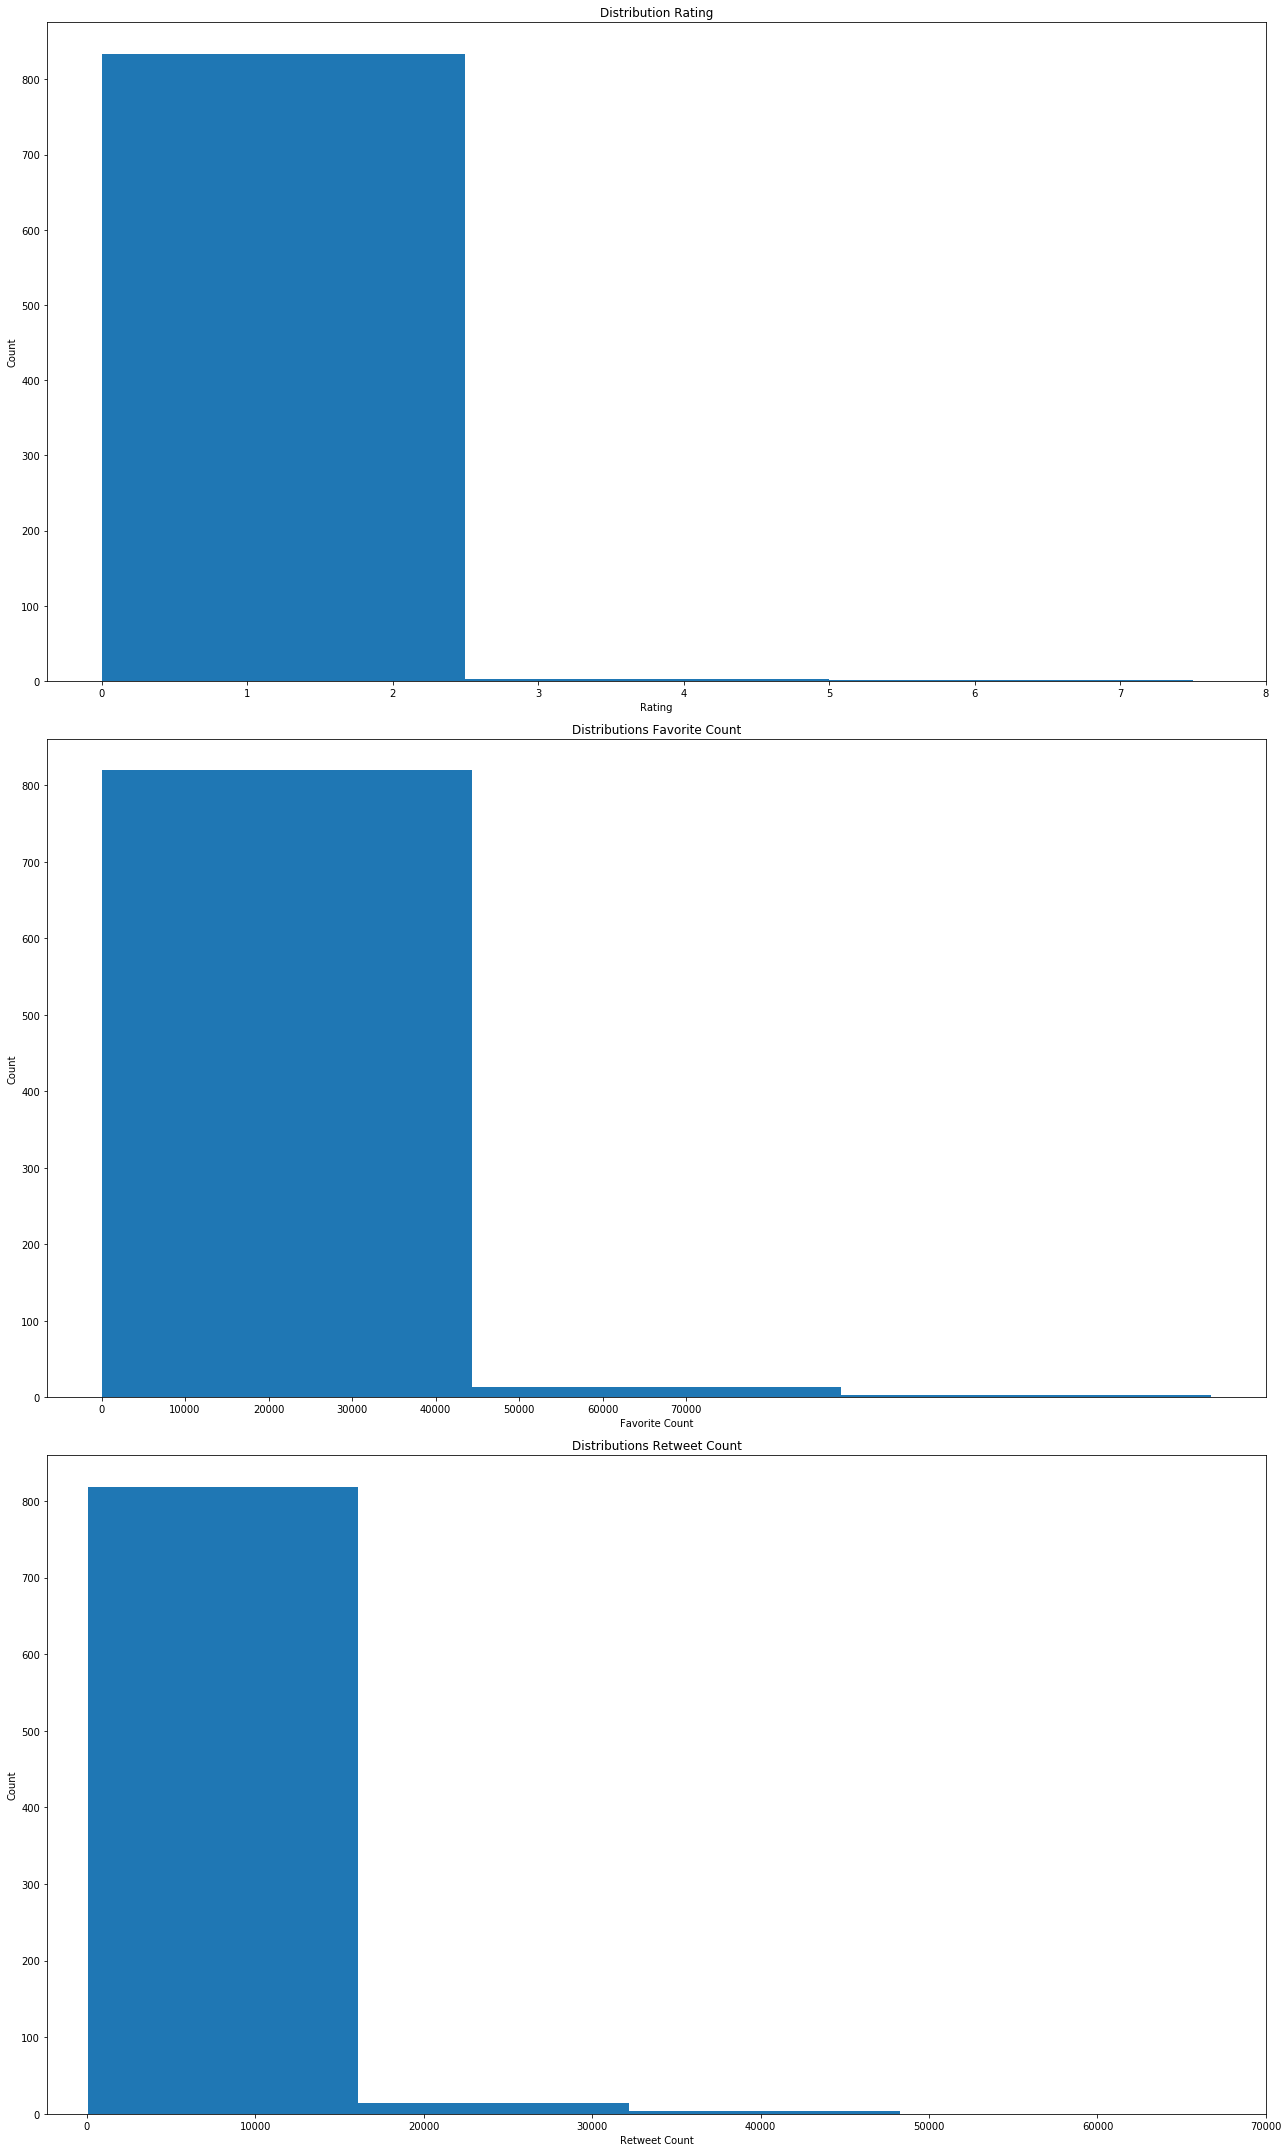

In [565]:
# creating the subplot for the following columns: favorite_count , retweet_count, new_rating

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18,30))
ax0, ax1, ax2= axes.flatten()
n_bins = 3
plt.setp(axes.flat, ylabel='Count')


ax0.hist(tweet_archive.rating_new,n_bins)
ax0.set(title = 'Distribution Rating', xlabel='Rating')
ax0.set_xticks([0,1,2,3,4,5,6,7,8])

ax1.hist(tweet_archive.favorite_count,n_bins)
ax1.set(title = 'Distributions Favorite Count', xlabel='Favorite Count')
ax1.set_xticks([0,10000,20000,30000,40000,50000,60000,70000])

ax2.hist(tweet_archive.retweet_count, n_bins)
ax2.set(title = 'Distributions Retweet Count', xlabel='Retweet Count')
ax2.set_xticks([0,10000,20000,30000,40000,50000,60000,70000])


fig.tight_layout();



The Histograms show that data rating, retweets and favorites is right-skewed.
(source: http://asq.org/learn-about-quality/data-collection-analysis-tools/overview/histogram2.html)

#### Question 1: Do the creator of WeRateDogs rate a some breeds better than others. Can we see from the data if the owners have a favorite breed? 

In [566]:
# in the first step I would to identify the 10 highest rated breeds in average
top_ten_breeds_creators = tweet_archive.groupby('breed').rating_new.mean().sort_values(ascending=False).head(10)
top_ten_breeds_creators

breed
clumber                    2.700000
black-and-tan coonhound    1.400000
pomeranian                 1.380000
appenzeller                1.300000
bouvier des flandres       1.300000
australian terrier         1.300000
kuvasz                     1.213333
english setter             1.200000
saluki                     1.200000
silky terrier              1.200000
Name: rating_new, dtype: float64

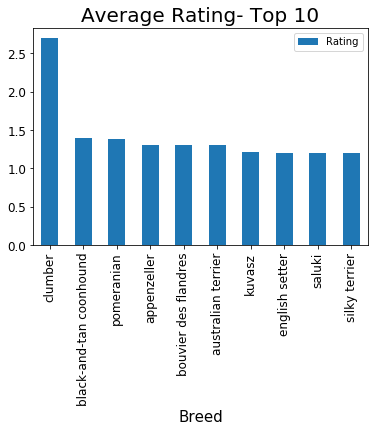

In [567]:
# plotting the 10 highest rated breeds in average
ax = top_ten_breeds_creators.plot(kind='bar', fontsize=12,legend=True)
ax.legend(['Rating'])
plt.xlabel('Breed', fontsize=15)
plt.title('Average Rating- Top 10',fontsize=20);


The finding shows that the creators of the Twitter Account WeRateDogs have their favorites when you look at the average rating of the different breeds. Maybe the creators have on of these breeds as pet and are therefore biased?

####  Question 2: Do the user have rate a some breeds retweet and fovourite some breeds more than others. Can we see from the data if the owners have a favorite breed?

In [568]:
# identifying the 10 highest retweeted breeds in average
top_ten_retweeted_breeds = tweet_archive.groupby('breed').retweet_count.mean().sort_values(ascending=False).head(10)
top_ten_retweeted_breeds

breed
bedlington terrier         11816.333333
whippet                    11085.666667
black-and-tan coonhound     8285.000000
cocker spaniel              7269.428571
french bulldog              7073.100000
briard                      6470.000000
irish water spaniel         6379.000000
flat-coated retriever       6378.000000
afghan hound                6308.000000
standard poodle             6134.444444
Name: retweet_count, dtype: float64

In [569]:
# identifying the 10 highest favorite breeds in average
top_ten_faved_breeds = tweet_archive.groupby('breed').favorite_count.mean().sort_values(ascending=False).head(10)
top_ten_faved_breeds

breed
black-and-tan coonhound    33911.000000
bedlington terrier         27883.333333
french bulldog             25533.400000
whippet                    24022.666667
irish water spaniel        23561.500000
flat-coated retriever      20354.250000
australian terrier         20011.000000
boxer                      18931.250000
briard                     18630.000000
bouvier des flandres       18032.000000
Name: favorite_count, dtype: float64

#### The findings show that the users and creators dont have exactly the same favorites but there are 2 breeds in the Top 10 rated list which have a lot of retweets and/or favorites:
- black-and-tan coonhound
- bouvier des flandres

its also interesting to see that the most of the top retweeted and faved breeds are not the same: the bedlington terrier is the most retweeted and the black-and-tan coonhound is the most faved breed.
It would be interesting to further investigate when the user retweeted a tweet and when they faved a tweet.

#### All in all, it seems like the black-and-tan coonhound is the most popular breed among the creators of WeRateDogs (#2 of 10) and among the users (#1 of 10 in faved tweets and #3 of 10 in retweets) 

#### Question 3:  I would like to know if the sucess of a tweet in terms of amount of retweets and favorites is related to the rating from WeRateDogs (have higher rated dogs more retweets & get more favorites)

I will fit two Linear Regression Model model with statsmodel libary to predict the retweet based based on the rating and to predict the favorite count based on the rating. We define our alpa with 0.05

In [570]:
import statsmodels.api as sm

In [571]:
# add an intercept
tweet_archive['intercept'] = 1

In [572]:
# model to predict the retweet based on the rating 
lm = sm.OLS(tweet_archive['retweet_count'], tweet_archive[['intercept', 'rating_new']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     37.51
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           1.40e-09
Time:                        19:32:44   Log-Likelihood:                -8215.1
No. Observations:                 837   AIC:                         1.643e+04
Df Residuals:                     835   BIC:                         1.644e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -553.2992    578.971     -0.956      0.340   -1689.709     583.111
rating_new  3135.1352    511.917      6.124      0.000    2130.341    4139.930
==============================================================================
Omnibus:                      856.307   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41232.968
Skew:                           4.826   Prob(JB):                         0.00
Kurtosis:                      36.002   Cond. No.                         7.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [573]:
# modelto predict the favorite count based on the rating 
lm = sm.OLS(tweet_archive['favorite_count'], tweet_archive[['intercept', 'rating_new']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     59.29
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           3.84e-14
Time:                        19:32:45   Log-Likelihood:                -9087.3
No. Observations:                 837   AIC:                         1.818e+04
Df Residuals:                     835   BIC:                         1.819e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2645.6539   1641.371     -1.612      0.107   -5867.352     576.044
rating_new  1.118e+04   1451.272      7.700      0.000    8326.517     1.4e+04
==============================================================================
Omnibus:                      668.766   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17126.125
Skew:                           3.448   Prob(JB):                         0.00
Kurtosis:                      24.060   Cond. No.                         7.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

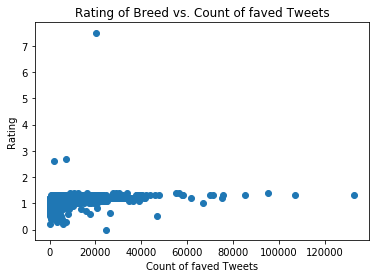

In [574]:
# plotting a scatterplot to visualize the relationship
plt.scatter(tweet_archive['favorite_count'], tweet_archive['rating_new']);
plt.xlabel('Count of faved Tweets');
plt.ylabel('Rating');
plt.title('Rating of Breed vs. Count of faved Tweets');

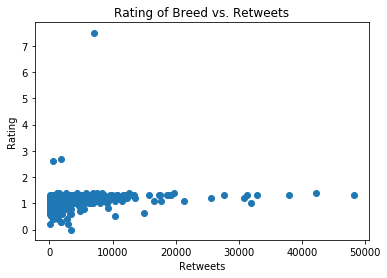

In [575]:
# plotting a scatterplot to visualize the relationship
plt.scatter(tweet_archive['retweet_count'], tweet_archive['rating_new']);
plt.xlabel('Retweets');
plt.ylabel('Rating');
plt.title('Rating of Breed vs. Retweets');

You can say from the p-values (in both models its 0.000) that the rating from the creators of WeRateDogs have a on the number of retweets and favorites a tweet is statistically significant.
We can see from the coeffcients that the rating from the creators of WeRateDogs have a positive effect on the number of retweets and favorites:
For every unit in increase in the rating, the tweets gets 3135 more retweets and 1.12 more favorites.
These findings are supported by the scatterplots

Even though we have statistical significant results, the the R-squared value are really low which indicates that our models doesnt fit the data really well
(source:https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54/modules/82c7c576-88f5-43b6-80fc-c53378527a2d/lessons/d780a3b0-a08e-4282-858e-6a28e8d524aa/concepts/f57165c9-d120-4277-b920-f427bbdb060b)

Please find a summary of the Investigation here

file:///Users/jamu/Downloads/act_report.html